In [0]:
# Author: Nurtai Maksat
# Group: CSSE-1605
# import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [0]:
class Model:
  def __init__(self):
    self.celsius = []
    self.fahrnheit = []
    self.M = None
    self.history = None
    
  def generateExamples(self):
    count = 50
    celsius = -40
    while count>0:
      fahrnheit = celsius*1.8 + 32
      self.celsius.append(celsius)
      self.fahrnheit.append(fahrnheit)
      celsius += 7
      count -= 1
    self.celsius = np.array(self.celsius, dtype=float)
    self.fahrnheit = np.array(self.fahrnheit, dtype=float)
   
  def train(self):
    l1 = Dense(units=5, input_shape=[1])
    l2 = Dense(units=5)
    l3 = Dense(units=3)
    l4 = Dense(units=1)
    self.M = Sequential([l1, l2, l3, l4])
    self.M.compile(loss='mean_squared_error', optimizer=Adam(0.1))
    self.history = self.M.fit(self.celsius, self.fahrnheit, epochs=333, verbose=False)
  
  def plot(self):
    plt.xlabel('Epoch')
    plt.ylabel("Loss")
    plt.plot(self.history.history['loss'])
    plt.show()

  def predict(self, test):
    predicted = self.M.predict([test])
    print("Predicted value is",predicted)
    print("Actual value is", test*1.8+32)

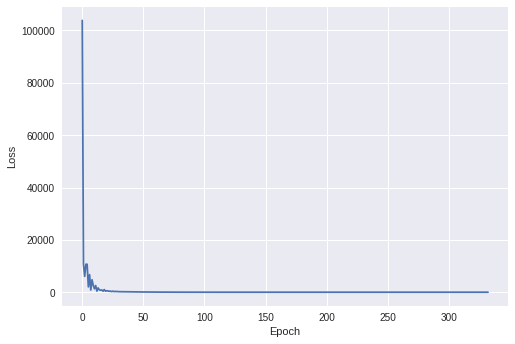

Predicted value is [[311.00006]]
Actual value is 311.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_29 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 4         
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [21]:
model = Model()
model.generateExamples()
model.train()
model.plot()
model.predict(155)
model.M.summary()